In [50]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class' ]

In [52]:
data = pd.read_csv('C:\\Users\\Deepak\\Downloads\\pima-indians-diabetes.csv', names = columns)

# Preprocessing Stage

In [53]:
data.shape

(768, 9)

In [54]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Class                         int64
dtype: object

In [55]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
data.head(15)  #Let's see the data by printing 15 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [57]:
data.isnull().sum() #Let's see if we have null values in columns

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

In [58]:
data.isnull().values.sum()  #No null values, only need to work on values where 0 is there for above mentioned 5 columns

0

In [59]:
#Calculating the no. of cells with 0 as value

(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [60]:
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [61]:
(data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [62]:
#Let's confirm whether null is correctly replaced with all 0's
data.isnull().sum() #Count is matching

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Class                         0
dtype: int64

In [63]:
data.fillna(data.mean(), inplace = True)  #Filling all null values with mean of that column

In [64]:
data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [65]:
#Creating Train and Test set
X = data.drop(columns = 'Class')
y = data['Class']

In [66]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [67]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

# Model fitting and Prediction

In [69]:
#Support Vector Machine

model = svm.SVC(kernel='linear', C=1, gamma=1) 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.765625

In [70]:
#Knn Classifer

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.71875

In [71]:
#Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7604166666666666

# Inferences

In [72]:
# 1) Checking for Standardization

    # a) Log-Normalization

In [73]:
data.var()

Pregnancies                   11.354056
Glucose                      926.346983
BloodPressure                146.321591
SkinThickness                 77.280660
Insulin                     7228.588766
BMI                           47.267706
DiabetesPedigreeFunction       0.109779
Age                          138.303046
Class                          0.227483
dtype: float64

In [74]:
#Since the variance between the data values is really high, so we need to normalize the data

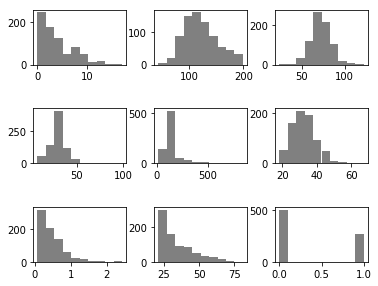

In [75]:
fig = plt.figure()
for i in range(0, data.shape[1]):
    fig.add_subplot(3,3,i+1)
    plt.hist(data.iloc[:, i], color = "grey")
plt.subplots_adjust(wspace = 0.3, hspace = 0.8, top = 1)
plt.show()

In [76]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[cols] = np.log(data[cols]+1) # Applying log  #Do not normalize the binary column i.e. Class

In [77]:
data.var()

Pregnancies                 0.592638
Glucose                     0.061275
BloodPressure               0.029615
SkinThickness               0.098545
Insulin                     0.258643
BMI                         0.041711
DiabetesPedigreeFunction    0.039406
Age                         0.098197
Class                       0.227483
dtype: float64

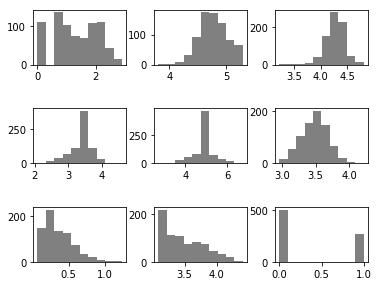

In [78]:
#Post-Normalization

fig = plt.figure()
for i in range(0, data.shape[1]):
    fig.add_subplot(3,3,i+1)
    plt.hist(data.iloc[:, i], color = "grey")
plt.subplots_adjust(wspace = 0.3, hspace = 0.8, top = 1)
plt.show()

In [79]:
# b) Feature Scaling?
#    Column values are now belong to same scale (every data value is ranging from 0 to 6 only), hence no need of feature scaling
data.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,1.310613,4.779227,4.281783,3.360850,4.932851,3.489506,0.365317,3.481574,0.348958
std,0.769830,0.247538,0.172090,0.313919,0.508570,0.204232,0.198510,0.313364,0.476951
min,0.000000,3.806662,3.218876,2.079442,2.708050,2.954910,0.075107,3.091042,0.000000
25%,0.693147,4.612633,4.174387,3.258097,4.808086,3.349904,0.218131,3.218876,0.000000
50%,1.386294,4.770685,4.293227,3.406298,5.053364,3.508556,0.316633,3.401197,0.000000
75%,1.945910,4.950527,4.394449,3.496508,5.053364,3.627004,0.486277,3.737670,1.000000
max,2.890372,5.298317,4.812184,4.605170,6.741701,4.220977,1.229641,4.406719,1.000000


In [80]:
#Creating Train and Test set again
X = data.drop(columns = 'Class')
y = data['Class']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [82]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
523,2.302585,4.875197,4.262680,3.406298,5.053364,3.561046,0.501987,3.828641
690,2.197225,4.682131,4.394449,3.406298,5.053364,3.242592,0.618424,3.555348
480,1.386294,5.068904,4.262680,3.433987,5.796058,3.597312,0.295650,3.583519
286,1.791759,5.049856,4.442651,3.806662,6.302619,3.681351,0.481809,3.555348
205,1.791759,4.718499,4.290459,3.367296,5.053364,3.214868,0.341460,3.332205


In [83]:
y_train.value_counts()

0    375
1    201
Name: Class, dtype: int64

# Model fitting and Prediction

In [84]:
#Support Vector Machine

model = svm.SVC(kernel='linear', C=1, gamma=1) 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.78125

In [85]:
#Knn Classifer

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.75

In [86]:
#Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.71875

# Feature Selection

In [87]:
# Plotting correlation matrix to check if we can remove highly correlated features

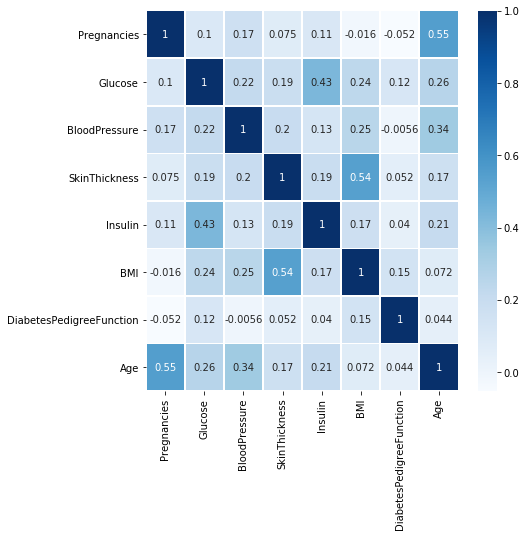

In [88]:
plt.subplots(figsize=(7,7))
sns.heatmap(data[data.columns[:8]].corr(), cmap='Blues', annot=True, linewidths=.5) # For Color ref: https://matplotlib.org/examples/color/colormaps_reference.html
plt.show()

In [89]:
#After usage of Random forest, we got to know that below 4 features are more relevant

col_subset = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class' ]
data_subset = data[col_subset]

In [90]:
data_subset.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age,Class
0,5.003946,3.543854,0.486738,3.931826,1
1,4.454347,3.317816,0.300845,3.465736,0
2,5.214936,3.190476,0.514021,3.496508,1
3,4.499810,3.370738,0.154436,3.091042,0
4,4.927254,3.786460,1.190279,3.526361,1


In [91]:
#Creating Train and Test set again
X = data_subset.drop(columns = 'Class')
y = data_subset['Class']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [93]:
X_train.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
727,4.955827,3.508556,0.359770,3.135494
45,5.198497,3.761200,1.062294,3.258097
672,4.234107,3.597312,0.250759,3.871201
366,4.828314,3.353407,0.313350,3.401197
718,4.691348,3.597312,0.347130,3.218876


In [94]:
y_train.value_counts()

0    375
1    201
Name: Class, dtype: int64

In [95]:
#Support Vector Machine

model = svm.SVC(kernel='linear', C=1, gamma=1) 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.78125

In [96]:
#Knn Classifer

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.75

In [97]:
#Logistic Regression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.65625

In [98]:
#Random Forest Classifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.75